In [3]:

def curve(filename):
    name=[]
    dis=[]
    pairs=[]
    cnt=0
    with open(filename) as f:
        lines = f.readlines()
        for l in lines:
            s = l.split()
            name.append(s[0])
            dis.append([float(x) for x in s[1:]])
            i=len(dis)-1
            for j in range(len(dis[i])):
                if i<j:
                    pairs.append((dis[i][j],i,j))
    pairs.sort()
    
    def same(i,j):
        return name[i][:5] == name[j][:5]

    atFAR=[0,10**(-7),10**(-6),10**(-5)]
    FRR=[1,1,1,1]
    para=[1,1,1,1]
    cnt = 0 
    tp,fp=0,0
    tn,fn=0,0
    for v,i,j in pairs:
        if same(i,j):
            fn+=1
        else:
            tn+=1

    arr_x=[]
    arr_y=[]
    for v,i,j in pairs:
        if same(i,j):
            tp+=1
            fn-=1
        else:
            fp+=1
            tn-=1
        cnt+=1
        #print(fp/cnt,tp/p)
        far = fp/(fp+tn)
        frr = fn/(fn+tp)

        arr_x.append(frr)
        arr_y.append(far)
        #print(frr,far)
        for i in range(len(atFAR)):
            if atFAR[i]>=far:
                if frr<FRR[i]:
                    FRR[i]=frr
                    para[i]=v
    print(FRR)
    print(para)

In [4]:
curve('di_insight_linf_feret')
curve('di_insight_e8_feret')
curve('di_insight_le_feret')
curve('di_insight_l2_feret')

[0.0855690482914431, 0.0855690482914431, 0.020615645297938436, 0.0005648121999435188]
[0.102858, 0.102858, 0.117116, 0.136091]
[0.8088235294117647, 0.8088235294117647, 0.19061085972850678, 0.0002828054298642534]
[0.0234623, 0.0234623, 0.0389783, 0.0577374]
[0.021462863597853713, 0.021462863597853713, 0.015814741598418527, 0.0]
[0.0594523, 0.0594523, 0.0608108, 0.0704181]
[0.024569330697543065, 0.024569330697543065, 0.0031064670996893535, 0.0]
[0.763572, 0.763572, 0.849296, 0.931558]


In [14]:
import numpy
import scipy
import scipy.stats
import scipy.optimize
import random
import matplotlib
import matplotlib.pyplot as plt
import math



def fit(x,y,t0):
    
    def f(x,a,b,c,d):
        return scipy.stats.johnsonsu.cdf(x,a,b,c,d)  

    para,_=scipy.optimize.curve_fit(f,x,y,maxfev=50000)
    rv=scipy.stats.johnsonsu(para[0],para[1],para[2],para[3])
    y2=numpy.array(list(map(rv.cdf,x)))
    plt.plot(x,y)
    plt.plot(x,y2)
    plt.show() 
    print(rv.cdf(t0))
    print(-math.log2(rv.cdf(t0)))

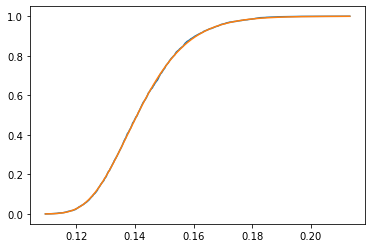

9.707326974548889e-07
19.974422576750452


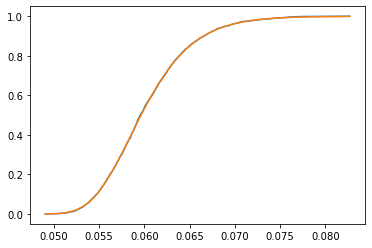

1.0562480324049699e-26
86.29118181314854


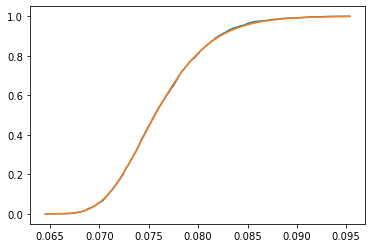

8.221887788834453e-36
116.54994173360738


In [17]:
def estimate(filename,t0):
    arr=[]
    with open(filename) as file:
        lines = file.readlines()
        arr=[float(l) for l in lines]
    arr.sort()
    y=[(i+1)/len(arr) for i in range(len(arr))]
    fit(arr,y,t0)
estimate('d2z_insight_linf_feret',0.102858)
estimate('d2z_insight_e8_feret',0.0234623)
estimate('d2z_insight_leech_feret',0.0594523) 

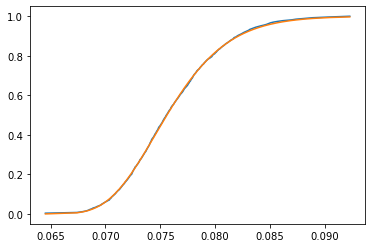

0.0645293,3.228609430221087e-05,0.0037174721189591076,0
0.0674084,0.0056802975325936,0.007434944237918215,1
0.0678848,0.00983417346767021,0.011152416356877323,2
0.0682335,0.014154032591856599,0.01486988847583643,3
0.0684383,0.017293957373566614,0.01858736059479554,4
0.068566,0.01950206927200046,0.022304832713754646,5
0.0687632,0.02331763491759733,0.026022304832713755,6
0.068868,0.025556706268168018,0.02973977695167286,7
0.0690967,0.030983268138011104,0.03345724907063197,8
0.0692186,0.03419257540607483,0.03717472118959108,9
0.0693949,0.03924258074393459,0.040892193308550186,10
0.0695768,0.04497835176315347,0.04460966542750929,11
0.0696302,0.04676637894532691,0.048327137546468404,12
0.0697521,0.05102903053282362,0.05204460966542751,13
0.0698484,0.05457700769592377,0.055762081784386616,14
0.0699646,0.05907357851070742,0.05947955390334572,15
0.0700923,0.06429048444267642,0.06319702602230483,16
0.0702094,0.069330650644307,0.06691449814126393,17
0.070359,0.0761297269117514,0.0706319702602230

In [27]:
def f(x,a,b,c,d):
    return scipy.stats.johnsonsu.cdf(x,a,b,c,d)  

filename='d2z_insight_leech_feret'

x=[]
with open(filename) as file:
    lines = file.readlines()
    x=[float(l) for l in lines]
x.sort()

x=x[0:len(x):10]

y=[(i+1)/len(x) for i in range(len(x))]
    
para,_=scipy.optimize.curve_fit(f,x,y,maxfev=50000)
rv=scipy.stats.johnsonsu(para[0],para[1],para[2],para[3])
y2=numpy.array(list(map(rv.cdf,x)))
plt.plot(x,y)
plt.plot(x,y2)
plt.show() 

for i in range(len(x)):
    print(str(x[i])+','+str(y2[i])+','+str(y[i])+','+str(i))